In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [53]:
df = pd.read_csv('emg_4_gestures.csv', delimiter='\t')
df.head()

,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,FilteredChannel1,FilteredChannel2,...,rawPPG2,rawPPG3,Hr,Hrv,Battery,Trigger,PhysicalTrigger,AutoTrigger,NumMeasurements,Timestamp
0,-48516.120,-26285.490,-50287.005,-56527.470,0.0,0.0,0.0,0.0,-27.849287,-13.202524,...,-1.0,-1.0,-1.0,-1.0,60.413793,0.0,-1.0,-1.0,442871.0,1.769284e+09
1,-48518.280,-26294.130,-50292.135,-56530.215,0.0,0.0,0.0,0.0,-19.892928,-12.405243,...,-1.0,-1.0,-1.0,-1.0,60.413793,0.0,-1.0,-1.0,442872.0,1.769284e+09
2,-48531.915,-26301.825,-50271.795,-56524.410,0.0,0.0,0.0,0.0,-4.202668,-10.598384,...,-1.0,-1.0,-1.0,-1.0,60.413793,0.0,-1.0,-1.0,442873.0,1.769284e+09
3,-48538.845,-26307.945,-50233.635,-56499.390,0.0,0.0,0.0,0.0,10.098207,-8.279977,...,-1.0,-1.0,-1.0,-1.0,60.413793,0.0,-1.0,-1.0,442874.0,1.769284e+09
4,-48522.555,-26289.720,-50268.960,-56524.365,0.0,0.0,0.0,0.0,16.825704,-4.147685,...,-1.0,-1.0,-1.0,-1.0,60.413793,0.0,-1.0,-1.0,442875.0,1.769284e+09


In [54]:
df.columns

Index(['Channel1', 'Channel2', 'Channel3', 'Channel4', 'Channel5', 'Channel6',
       'Channel7', 'Channel8', 'FilteredChannel1', 'FilteredChannel2',
       'FilteredChannel3', 'FilteredChannel4', 'FilteredChannel5',
       'FilteredChannel6', 'FilteredChannel7', 'FilteredChannel8', 'GyroX',
       'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ', 'PPG1', 'PPG2', 'rawPPG1',
       'rawPPG2', 'rawPPG3', 'Hr', 'Hrv', 'Battery', 'Trigger',
       'PhysicalTrigger', 'AutoTrigger', 'NumMeasurements', 'Timestamp'],
      dtype='object')

In [55]:
# drop columns that have the same value for all rows
const_cols = [c for c in df.columns if df[c].nunique(dropna=False) <= 1]
print("Constant columns to drop:", const_cols)
if const_cols:
    df.drop(columns=const_cols, inplace=True)
print("Remaining columns:", list(df.columns))

df.drop(columns=['Battery', 'GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ','NumMeasurements'], inplace=True)


Constant columns to drop: ['Channel5', 'Channel6', 'Channel7', 'Channel8', 'FilteredChannel5', 'FilteredChannel6', 'FilteredChannel7', 'FilteredChannel8', 'PPG1', 'PPG2', 'rawPPG1', 'rawPPG2', 'rawPPG3', 'Hr', 'Hrv', 'Trigger', 'PhysicalTrigger', 'AutoTrigger']
Remaining columns: ['Channel1', 'Channel2', 'Channel3', 'Channel4', 'FilteredChannel1', 'FilteredChannel2', 'FilteredChannel3', 'FilteredChannel4', 'GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ', 'Battery', 'NumMeasurements', 'Timestamp']


In [56]:
df.head(20)

,Channel1,Channel2,Channel3,Channel4,FilteredChannel1,FilteredChannel2,FilteredChannel3,FilteredChannel4,Timestamp
0,-48516.120,-26285.490,-50287.005,-56527.470,-27.849287,-13.202524,-0.420815,-3.377733,1.769284e+09
1,-48518.280,-26294.130,-50292.135,-56530.215,-19.892928,-12.405243,-2.995546,-1.882051,1.769284e+09
2,-48531.915,-26301.825,-50271.795,-56524.410,-4.202668,-10.598384,-3.110112,2.422276,1.769284e+09
3,-48538.845,-26307.945,-50233.635,-56499.390,10.098207,-8.279977,0.412321,6.835149,1.769284e+09
4,-48522.555,-26289.720,-50268.960,-56524.365,16.825704,-4.147685,5.974130,8.888416,1.769284e+09
5,-48481.335,-26263.845,-50305.275,-56560.230,17.189711,2.981821,7.421182,5.878571,1.769284e+09
6,-48487.860,-26268.075,-50267.340,-56516.985,15.476548,11.801825,0.870264,-2.257591,1.769284e+09
7,-48501.720,-26291.250,-50244.705,-56481.705,11.934917,16.979066,-7.351590,-8.486245,1.769284e+09
8,-48523.500,-26323.290,-50291.280,-56532.735,3.600344,12.890724,-9.330700,-6.851903,1.769284e+09
9,-48521.655,-26319.915,-50297.580,-56534.310,-8.788190,0.328468,-6.722572,-1.943963,1.769284e+09


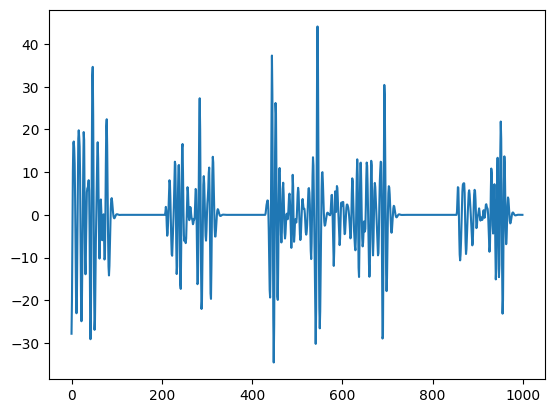

In [57]:
plt.plot(df['FilteredChannel1'][:1000])